In [2]:
import json
import pandas as pd
from transformers import AutoTokenizer
import matplotlib.pyplot as plt
import data_loader

None of PyTorch, TensorFlow >= 2.0, or Flax have been found. Models won't be available and only tokenizers, configuration and file/data utilities can be used.


In [3]:
model_checkpoint = "bert-base-cased"
tokenizer = AutoTokenizer.from_pretrained(model_checkpoint)

In [4]:
dev_jsonSQUAD1 = "C:\\venvs\data_analysis\eon_project\SQuAD\dev-v1.1.json"
train_jsonSQUAD1 = "C:\\venvs\data_analysis\eon_project\SQuAD\\train-v1.1.json"

dev_jsonSQUAD2 = "C:\\venvs\data_analysis\eon_project\SQuAD\dev-v2.0.json"
train_jsonSQUAD2 = "C:\\venvs\data_analysis\eon_project\SQuAD\\train-v2.0.json"

dev_jsonGerman = "C:\\venvs\data_analysis\eon_project\GermanQuAD\GermanQuAD_test_cleaned.json"
train_jsonGerman = "C:\\venvs\data_analysis\eon_project\GermanQuAD\GermanQuAD_train_cleaned.json"

# SQuAD1.1

### Dev set

### Train set

18896


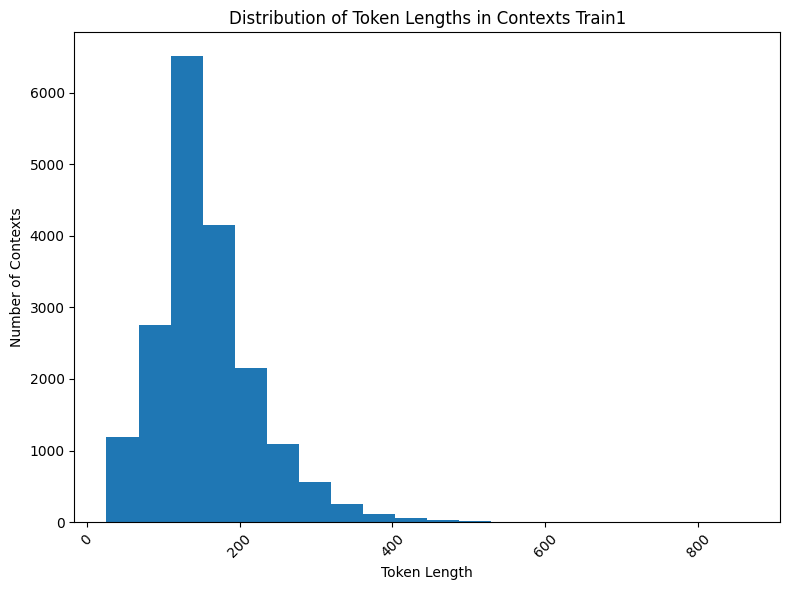

' # Count contexts in each category\ncategory_counts = [0, 0]\nfor length in tokenized_context_lengths:\n    if length <= max_token_length:\n        category_counts[0] += 1\n    else:\n        category_counts[1] += 1\n\n# Create the pie chart\nplt.figure(figsize=(6, 6))\nplt.pie(\n    category_counts, labels=category_labels, autopct="%1.1f%%"\n)  # Adjust format string for percentages\nplt.title("Distribution of Context Lengths (Categorized) Train1")\nplt.show() '

In [21]:
#   SQuAD1.1 - Train set

# Create a DataFrame
df_train = data_loader.build_simple_data_frame(train_jsonSQUAD1)
print(len(df_train["context"]))

df_train["tokenized_context"] = df_train["context"].apply(
    lambda context: tokenizer.tokenize(context)
)

tokenized_context_lengths = []

for context in df_train["tokenized_context"]:
    tokenized_context_lengths.append(len(context))

token_length_distribution = {}
for length in tokenized_context_lengths:
    if length not in token_length_distribution:
        token_length_distribution[length] = 0
    token_length_distribution[length] += 1

plt.figure(figsize=(8, 6))
plt.hist(tokenized_context_lengths, bins=20)  # Adjust the number of bins here
plt.xlabel("Token Length")
plt.ylabel("Number of Contexts")
plt.title("Distribution of Token Lengths in Contexts Train1")
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

""" # Count contexts in each category
category_counts = [0, 0]
for length in tokenized_context_lengths:
    if length <= max_token_length:
        category_counts[0] += 1
    else:
        category_counts[1] += 1

# Create the pie chart
plt.figure(figsize=(6, 6))
plt.pie(
    category_counts, labels=category_labels, autopct="%1.1f%%"
)  # Adjust format string for percentages
plt.title("Distribution of Context Lengths (Categorized) Train1")
plt.show() """

### Dev + Train set comparison

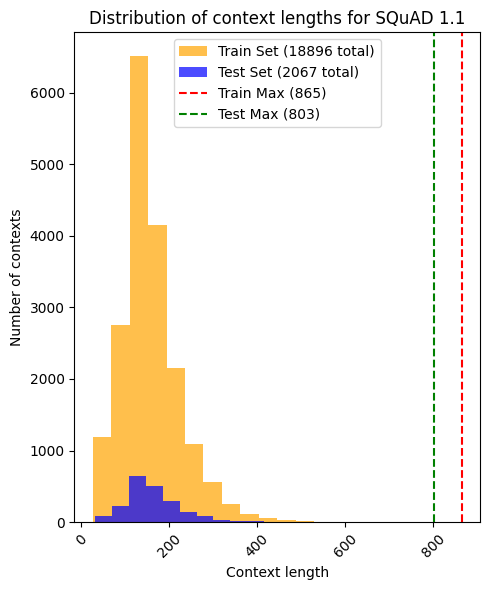

In [6]:
#   SQuAD1.1 - Dev set

max_token_length = 512

# Create a DataFrame
df_def = data_loader.build_simple_data_frame(dev_jsonSQUAD1)
df_train = data_loader.build_simple_data_frame(train_jsonSQUAD1)

# Tokenize contexts using the loaded tokenizer
# Add a new column to the DataFrame for tokenized contexts
df_def["tokenized_context"] = df_def["context"].apply(
    lambda context: tokenizer.tokenize(context)
)
df_train["tokenized_context"] = df_train["context"].apply(
    lambda context: tokenizer.tokenize(context)
)

tokenized_context_lengths_dev = []
tokenized_context_lengths_train = []

for context in df_def["tokenized_context"]:
    tokenized_context_lengths_dev.append(len(context))

for context in df_train["tokenized_context"]:
    tokenized_context_lengths_train.append(len(context))

max_token_length_dev = 0
for length in tokenized_context_lengths_dev:
    if length > max_token_length_dev:
        max_token_length_dev = length

max_token_length_train = 0
for length in tokenized_context_lengths_train:
    if length > max_token_length_train:
        max_token_length_train = length

# Create the histogram with clear labels and annotations
plt.figure(figsize=(5, 6))

# Plot distributions as histograms with different colors
plt.hist(tokenized_context_lengths_train, bins=20, alpha=0.7, label=f"Train Set ({len(tokenized_context_lengths_train)} total)", color="orange")
plt.hist(tokenized_context_lengths_dev, bins=20, alpha=0.7, label=f"Test Set ({len(tokenized_context_lengths_dev)} total)", color="blue")  # Adjust bins as needed

# Add red lines for max token lengths
plt.axvline(x=max_token_length_train, color='red', linestyle='--', label=f'Train Max ({max_token_length_train})')
plt.axvline(x=max_token_length_dev, color='green', linestyle='--', label=f'Test Max ({max_token_length_dev})')
plt.xlabel("Context length")
plt.ylabel("Number of contexts")
plt.title("Distribution of context lengths for SQuAD 1.1")
plt.xticks(rotation=45)  # Rotate x-axis labels for readability
plt.legend()
plt.autoscale(axis='y')
#plt.ylim(20) 
plt.tight_layout()
plt.show()


# SQuAD2.0

In [36]:
#dev_json = "/Users/franciscomonteiro/Desktop/DAIAProjectLLM/dev-v1.1.json"
#train_json = "/Users/franciscomonteiro/Desktop/DAIAProjectLLM/train-v1.1.json"

dev_json = ("/Users/franciscomonteiro/Desktop/DAIAProjectLLM/eon_project/SQuAD/dev-v2.0.json")
train_json = ("/Users/franciscomonteiro/Desktop/DAIAProjectLLM/eon_project/SQuAD/train-v2.0.json")

#dev_json = "/Users/franciscomonteiro/Desktop/DAIAProjectLLM/eon_project/GermanQuAD/GermanQuAD_test_cleaned.json"
#train_json = "/Users/franciscomonteiro/Desktop/DAIAProjectLLM/eon_project/GermanQuAD/GermanQuAD_train_cleaned.json"

### Dev set

1204
['The', 'Norman', '##s', '(', 'Norman', ':', 'No', '##ur', '##mand', '##s', ';', 'French', ':', 'Norman', '##ds', ';', 'Latin', ':', 'Norman', '##ni', ')', 'were', 'the', 'people', 'who', 'in', 'the', '10th', 'and', '11th', 'centuries', 'gave', 'their', 'name', 'to', 'Normandy', ',', 'a', 'region', 'in', 'France', '.', 'They', 'were', 'descended', 'from', 'Norse', '(', '"', 'Norman', '"', 'comes', 'from', '"', 'Norse', '##man', '"', ')', 'raid', '##ers', 'and', 'pirates', 'from', 'Denmark', ',', 'Iceland', 'and', 'Norway', 'who', ',', 'under', 'their', 'leader', 'Roll', '##o', ',', 'agreed', 'to', 'swear', 'f', '##eal', '##ty', 'to', 'King', 'Charles', 'III', 'of', 'West', 'Fr', '##an', '##cia', '.', 'Through', 'generations', 'of', 'ass', '##im', '##ilation', 'and', 'mixing', 'with', 'the', 'native', 'Frank', '##ish', 'and', 'Roman', '-', 'G', '##aul', '##ish', 'populations', ',', 'their', 'descendants', 'would', 'gradually', 'merge', 'with', 'the', 'Carol', '##ing', '##ian', '-',

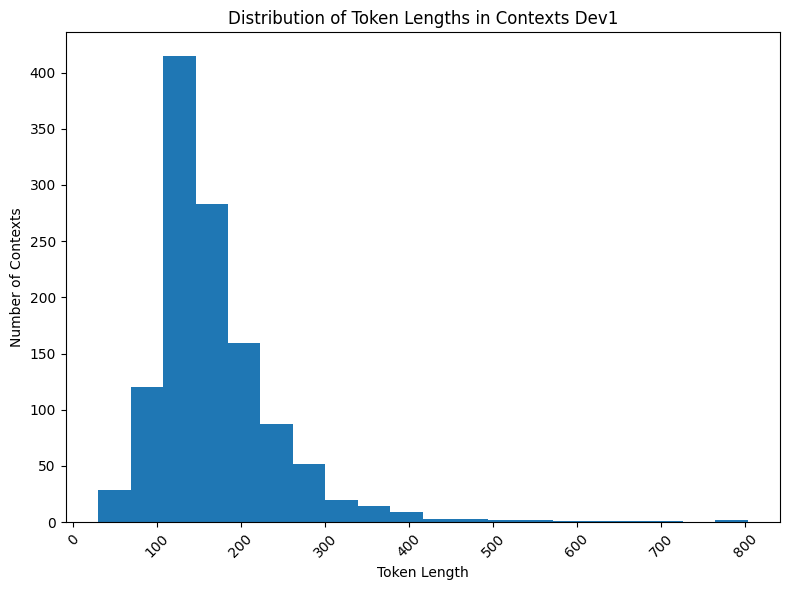

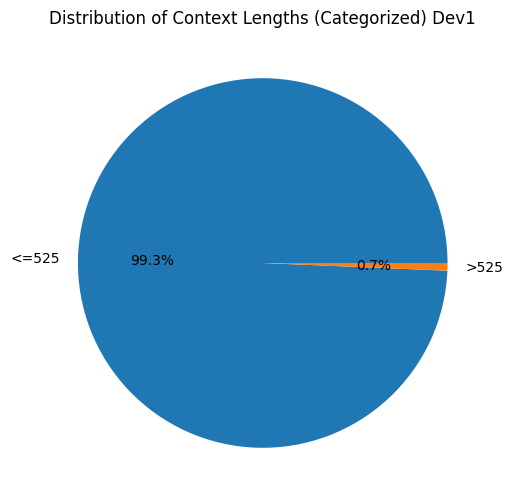

In [37]:
#   SQuAD2.0 - Dev set
max_token_length = 525

# Create a DataFrame
df_def = data_loader.build_simple_data_frame(dev_json)
print(len(df_def["context"]))

# Tokenize contexts using the loaded tokenizer
# Add a new column to the DataFrame for tokenized contexts
df_def["tokenized_context"] = df_def["context"].apply(
    lambda context: tokenizer.tokenize(context)
)

# Now you can analyze the tokenized versions of the contexts
print(df_def["tokenized_context"][0])  # Print the first few tokenized contexts


tokenized_context_lengths = []

for context in df_def["tokenized_context"]:
    tokenized_context_lengths.append(len(context))

token_length_distribution = {}
for length in tokenized_context_lengths:
    if length not in token_length_distribution:
        token_length_distribution[length] = 0
    token_length_distribution[length] += 1

print(token_length_distribution)

plt.figure(figsize=(8, 6))
plt.hist(tokenized_context_lengths, bins=20)  # Adjust the number of bins here
plt.xlabel("Token Length")
plt.ylabel("Number of Contexts")
plt.title("Distribution of Token Lengths in Contexts Dev1")
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

# Define max_token_lengths for categories
category_labels = ["<=" + str(max_token_length), ">" + str(max_token_length)]

# Count contexts in each category
category_counts = [0, 0]
for length in tokenized_context_lengths:
    if length <= max_token_length:
        category_counts[0] += 1
    else:
        category_counts[1] += 1

# Create the pie chart
plt.figure(figsize=(6, 6))
plt.pie(
    category_counts, labels=category_labels, autopct="%1.1f%%"
)  # Adjust format string for percentages
plt.title("Distribution of Context Lengths (Categorized) Dev1")
plt.show()

### Train set

19035


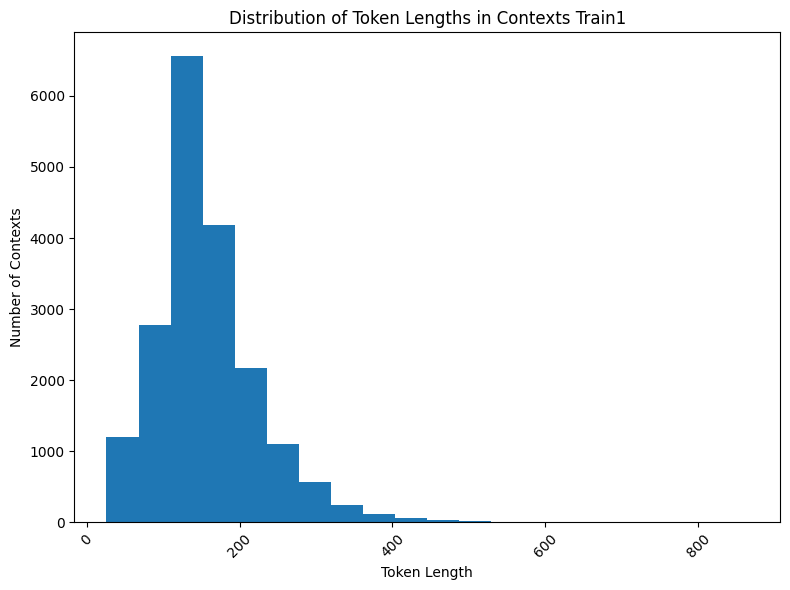

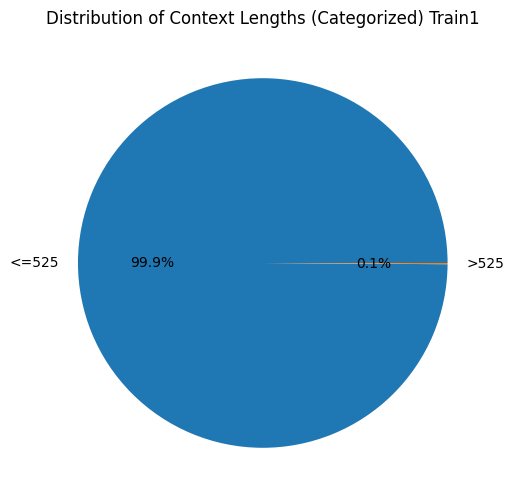

In [38]:
#   SQuAD2.0 - Train set
# Create a DataFrame
df_train = data_loader.build_simple_data_frame(train_json)
print(len(df_train["context"]))

df_train["tokenized_context"] = df_train["context"].apply(
    lambda context: tokenizer.tokenize(context)
)

tokenized_context_lengths = []

for context in df_train["tokenized_context"]:
    tokenized_context_lengths.append(len(context))

token_length_distribution = {}
for length in tokenized_context_lengths:
    if length not in token_length_distribution:
        token_length_distribution[length] = 0
    token_length_distribution[length] += 1

plt.figure(figsize=(8, 6))
plt.hist(tokenized_context_lengths, bins=20)  # Adjust the number of bins here
plt.xlabel("Token Length")
plt.ylabel("Number of Contexts")
plt.title("Distribution of Token Lengths in Contexts Train1")
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

# Count contexts in each category
category_counts = [0, 0]
for length in tokenized_context_lengths:
    if length <= max_token_length:
        category_counts[0] += 1
    else:
        category_counts[1] += 1

# Create the pie chart
plt.figure(figsize=(6, 6))
plt.pie(
    category_counts, labels=category_labels, autopct="%1.1f%%"
)  # Adjust format string for percentages
plt.title("Distribution of Context Lengths (Categorized) Train1")
plt.show()

### Dev + Train sets comparison

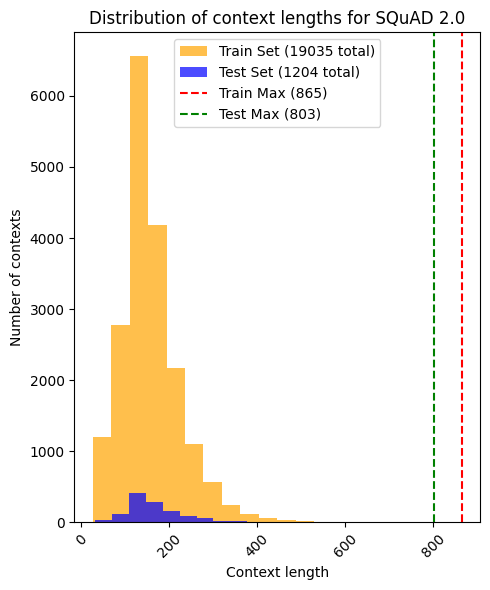

In [7]:
#   SQuAD1.1 - Dev set

max_token_length = 512

# Create a DataFrame
df_def = data_loader.build_simple_data_frame(dev_jsonSQUAD2)
df_train = data_loader.build_simple_data_frame(train_jsonSQUAD2)

# Tokenize contexts using the loaded tokenizer
# Add a new column to the DataFrame for tokenized contexts
df_def["tokenized_context"] = df_def["context"].apply(
    lambda context: tokenizer.tokenize(context)
)
df_train["tokenized_context"] = df_train["context"].apply(
    lambda context: tokenizer.tokenize(context)
)

tokenized_context_lengths_dev = []
tokenized_context_lengths_train = []

for context in df_def["tokenized_context"]:
    tokenized_context_lengths_dev.append(len(context))

for context in df_train["tokenized_context"]:
    tokenized_context_lengths_train.append(len(context))

max_token_length_dev = 0
for length in tokenized_context_lengths_dev:
    if length > max_token_length_dev:
        max_token_length_dev = length

max_token_length_train = 0
for length in tokenized_context_lengths_train:
    if length > max_token_length_train:
        max_token_length_train = length

# Create the histogram with clear labels and annotations
plt.figure(figsize=(5, 6))

# Plot distributions as histograms with different colors
plt.hist(tokenized_context_lengths_train, bins=20, alpha=0.7, label=f"Train Set ({len(tokenized_context_lengths_train)} total)", color="orange")
plt.hist(tokenized_context_lengths_dev, bins=20, alpha=0.7, label=f"Test Set ({len(tokenized_context_lengths_dev)} total)", color="blue")  # Adjust bins as needed

# Add red lines for max token lengths
plt.axvline(x=max_token_length_train, color='red', linestyle='--', label=f'Train Max ({max_token_length_train})')
plt.axvline(x=max_token_length_dev, color='green', linestyle='--', label=f'Test Max ({max_token_length_dev})')
plt.xlabel("Context length")
plt.ylabel("Number of contexts")
plt.title("Distribution of context lengths for SQuAD 2.0")
plt.xticks(rotation=45)  # Rotate x-axis labels for readability
plt.legend()
plt.autoscale(axis='y')
#plt.ylim(20) 
plt.tight_layout()
plt.show()


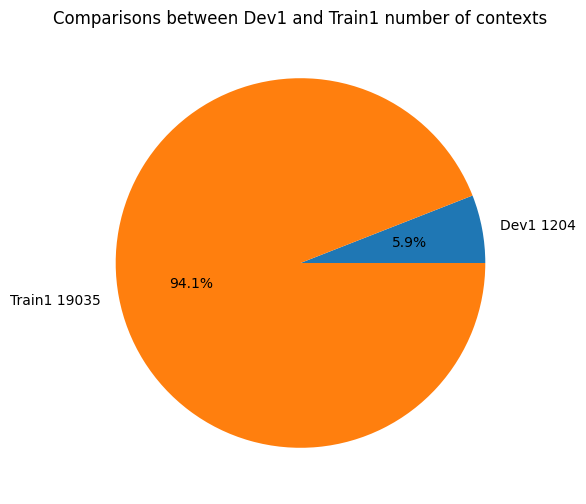

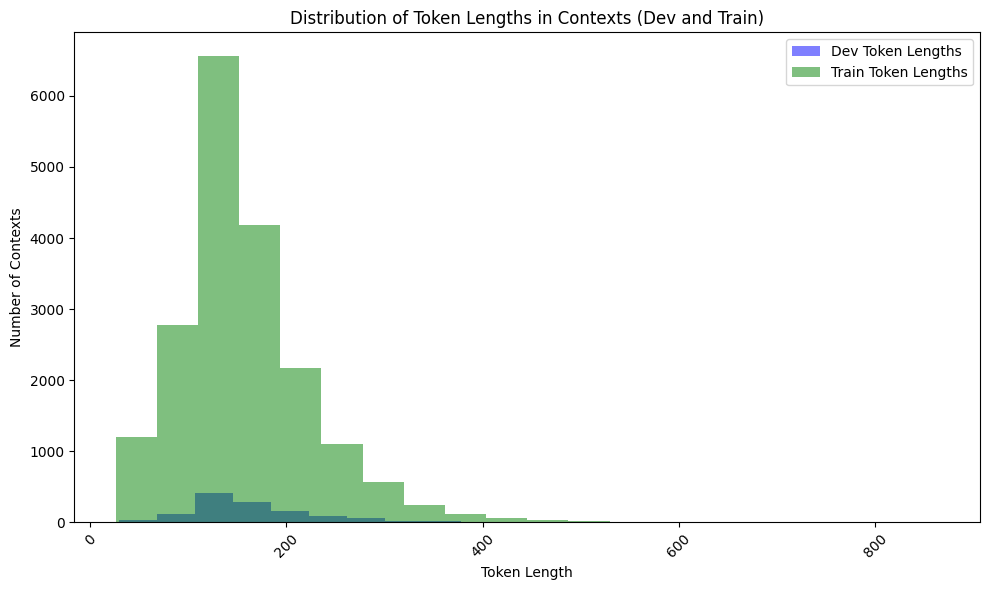

In [39]:
#SQuAD2.0 - Dev + Train sets

compare_dev_train_1 = []
compare_dev_train_1.append(len(df_def["context"]))
compare_dev_train_1.append(len(df_train["context"]))

category_labels = [
    "Dev1 " + str(len(df_def["context"])),
    "Train1 " + str(len(df_train["context"])),
]

# Create the pie chart
plt.figure(figsize=(6, 6))
plt.pie(
    compare_dev_train_1, labels=category_labels, autopct="%1.1f%%"
)  # Adjust format string for percentages
plt.title("Comparisons between Dev1 and Train1 number of contexts")
plt.show()


# Tokenize contexts using the loaded tokenizer
df_def["tokenized_context"] = df_def["context"].apply(
    lambda context: tokenizer.tokenize(context)
)
df_train["tokenized_context"] = df_train["context"].apply(
    lambda context: tokenizer.tokenize(context)
)

# Analyze tokenized contexts
tokenized_context_lengths_dev = [
    len(context) for context in df_def["tokenized_context"]
]
tokenized_context_lengths_train = [
    len(context) for context in df_train["tokenized_context"]
]

# Plot both distributions in one histogram
plt.figure(figsize=(10, 6))

plt.hist(
    tokenized_context_lengths_dev,
    bins=20,
    alpha=0.5,
    label="Dev Token Lengths",
    color="blue",
)
plt.hist(
    tokenized_context_lengths_train,
    bins=20,
    alpha=0.5,
    label="Train Token Lengths",
    color="green",
)

plt.xlabel("Token Length")
plt.ylabel("Number of Contexts")
plt.title("Distribution of Token Lengths in Contexts (Dev and Train)")
plt.legend(loc="upper right")
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

### Impossible vs Possible questions

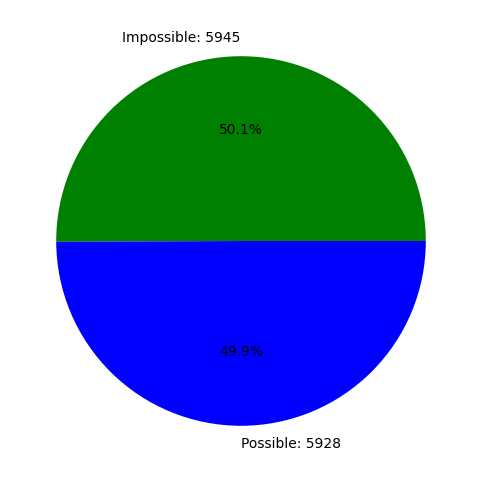

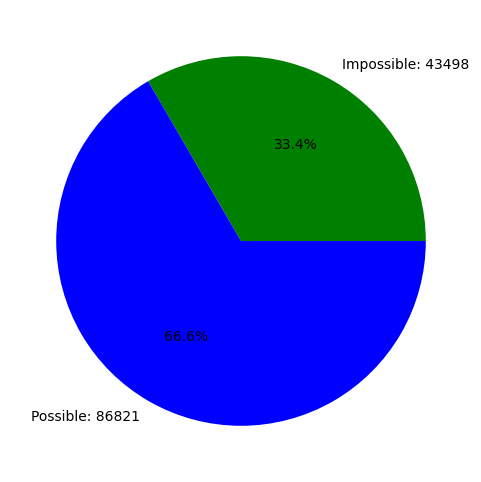

In [51]:

df_dev = data_loader.build_extended_data_frame_is_impossible(dev_jsonSQUAD2)
df_train = data_loader.build_extended_data_frame_is_impossible(train_jsonSQUAD2)

count_impossible_possible = [0, 0]

for is_impossible in df_dev["is_impossible"]:
    if is_impossible:
        count_impossible_possible[0] += 1
    else:
        count_impossible_possible[1] += 1

category_labels = [
    "Impossible: " + str(count_impossible_possible[0]),
    "Possible: " + str(count_impossible_possible[1]),
]

# Create the pie chart
plt.figure(figsize=(6, 6))
plt.pie(
    count_impossible_possible, labels=category_labels, autopct="%1.1f%%", colors=["green", "blue"]
)  # Adjust format string for percentages
plt.show()

count_impossible_possible = [0, 0]

for is_impossible in df_train["is_impossible"]:
    if is_impossible:
        count_impossible_possible[0] += 1
    else:
        count_impossible_possible[1] += 1

category_labels = [
    "Impossible: " + str(count_impossible_possible[0]),
    "Possible: " + str(count_impossible_possible[1]),
]

# Create the pie chart
plt.figure(figsize=(6, 6))
plt.pie(
    count_impossible_possible, labels=category_labels, autopct="%1.1f%%", colors=["green", "blue"]
)  
plt.show()


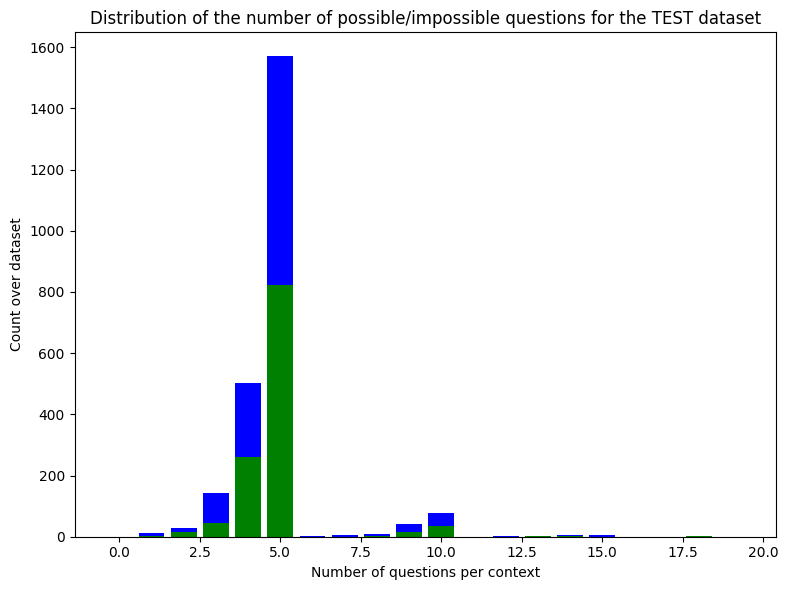

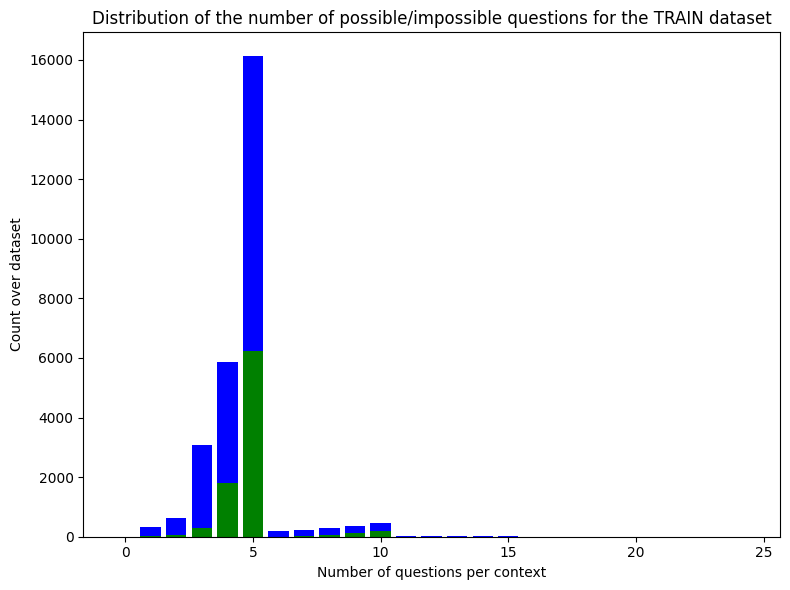

In [8]:
df_dev = data_loader.build_extended_data_frame_is_impossible(dev_jsonSQUAD2)
df_train = data_loader.build_extended_data_frame_is_impossible(train_jsonSQUAD2)


def build_is_impossible_counts(df):
    """Creates dictionaries for is_impossible occurrences per context ID.

    Args:
        df: A Pandas DataFrame containing 'context_id' and 'is_impossible' columns.

    Returns:
        A tuple containing two dictionaries:
            - impossible_counts: Maps context_id to the number of "is_impossible=True" occurrences.
            - possible_counts: Maps context_id to the number of "is_impossible=False" occurrences.
    """
    impossible_counts = {}
    possible_counts = {}
    for index, row in df.iterrows():
        context_id = row["context_id"]
        is_impossible = row["is_impossible"]

        if is_impossible:
            impossible_counts[context_id] = impossible_counts.get(context_id, 0) + 1
        else:
            possible_counts[context_id] = possible_counts.get(context_id, 0) + 1

    return impossible_counts, possible_counts

def build_distribution(counts):
    distribution = {}
    for count in counts.values():
        if count not in distribution:
            distribution[count] = 1
        else:
            distribution[count] += 1
    return distribution

def plot_questiontype_distribution_per_context(ids_counts):
    """Creates a histogram for the distribution of "is_impossible" occurrences per context ID.

    Args:
        impossible_counts: A dictionary mapping context_id to the number of "is_(im)possible" occurrences.
    """
    # Extract counts as separate lists
    counts = list(ids_counts.values())

    # Create the histogram
    plt.figure(figsize=(8, 6))
    plt.hist(counts)  # Use counts directly for the histogram
    plt.xlabel("Number of 'is_impossible=True' Occurrences")
    plt.ylabel("Number of Contexts")
    plt.title("Distribution of '-' Occurrences per Context ID")
    plt.xticks(rotation=0)  # Keep labels horizontal
    plt.tight_layout()
    plt.show()

def plot_questiontype_distribution_per_dataset(possible_distribution, impossible_distribution, dataset_name):
  """Creates a bar chart for the distribution of possible/impossible questions for a dataset.

  Args:
    possible_distribution: A dictionary mapping "is_impossible=False" questions per context to the count per dataset for said question.
    impossible_counts: A dictionary mapping "is_impossible=True" to its count.
    dataset_name: Name of the dataset (e.g., "Dev", "Train").
  """
  highest_n_questions = 0
  for n in possible_distribution.keys():
      if n > highest_n_questions:
          highest_n_questions = n
  for n in impossible_distribution.keys():
      if n > highest_n_questions:
          highest_n_questions = n
  possible_sorted_and_buffered_distribution = {}
  for i in range(highest_n_questions):
      if i in possible_distribution:
          possible_sorted_and_buffered_distribution[i] = possible_distribution[i]
      else:
          possible_sorted_and_buffered_distribution[i] = 0
  impossible_sorted_and_buffered_distribution = {}
  for i in range(highest_n_questions):
      if i in impossible_distribution:
          impossible_sorted_and_buffered_distribution[i] = impossible_distribution[i]
      else:
          impossible_sorted_and_buffered_distribution[i] = 0
  # Create the bar chart with clear labels and colors
  plt.figure(figsize=(8, 6))
  plt.bar(impossible_sorted_and_buffered_distribution.keys(), impossible_sorted_and_buffered_distribution.values(), color="green")
  plt.bar(possible_sorted_and_buffered_distribution.keys(), possible_sorted_and_buffered_distribution.values(), color="blue", bottom=impossible_sorted_and_buffered_distribution.values())
  plt.xlabel("Number of questions per context")
  plt.ylabel("Count over dataset")
  plt.title(f"Distribution of the number of possible/impossible questions for the {dataset_name} dataset")
  plt.xticks(rotation=0)  # Keep labels horizontal
  plt.tight_layout()
  plt.show()

#Entry Point

impossible_counts, possible_counts = build_is_impossible_counts(df_dev)

#plot_questiontype_distribution_per_context(impossible_counts)
#plot_questiontype_distribution_per_context(possible_counts)
impossible_distribution = build_distribution(impossible_counts)
possible_distribution = build_distribution(possible_counts)
#print(impossible_distribution)
#print(possible_distribution)
plot_questiontype_distribution_per_dataset(possible_distribution, impossible_distribution, "TEST")

impossible_counts, possible_counts = build_is_impossible_counts(df_train)

#plot_questiontype_distribution_per_context(impossible_counts)
#plot_questiontype_distribution_per_context(possible_counts)
impossible_distribution = build_distribution(impossible_counts)
possible_distribution = build_distribution(possible_counts)
plot_questiontype_distribution_per_dataset(possible_distribution, impossible_distribution, "TRAIN")



# GermanQuAD

In [18]:
#dev_json = "/Users/franciscomonteiro/Desktop/DAIAProjectLLM/dev-v1.1.json"
#train_json = "/Users/franciscomonteiro/Desktop/DAIAProjectLLM/train-v1.1.json"

#dev_json = ("/Users/franciscomonteiro/Desktop/DAIAProjectLLM/eon_project/SQuAD/dev-v2.0.json")
#train_json = ("/Users/franciscomonteiro/Desktop/DAIAProjectLLM/eon_project/SQuAD/train-v2.0.json")

dev_json = "C:\\venvs\data_analysis\eon_project\GermanQuAD\GermanQuAD_test_cleaned.json"
train_json = "C:\\venvs\data_analysis\eon_project\GermanQuAD\GermanQuAD_train_cleaned.json"

### Dev set

474
['Au', '##f', '##zu', '##gs', '##an', '##lage', '=', '=', '=', 'Se', '##illo', '##ser', 'Au', '##f', '##zu', '##g', '=', '=', '=', 'An', 'der', 'R', '##W', '##TH', 'A', '##ache', '##n', 'im', 'Institut', 'für', 'El', '##ek', '##tri', '##sche', 'Ma', '##sch', '##inen', 'w', '##ur', '##de', 'e', '##in', 'se', '##illo', '##ser', 'Au', '##f', '##zu', '##g', 'en', '##t', '##wick', '##el', '##t', 'und', 'e', '##in', 'Proto', '##ty', '##p', 'au', '##f', '##ge', '##ba', '##ut', '.', 'Die', 'Ka', '##bine', 'w', '##ir', '##d', 'hi', '##er', '##bei', 'du', '##rch', 'z', '##wei', 'el', '##ek', '##trom', '##ag', '##net', '##ische', 'S', '##ync', '##hr', '##on', '-', 'Line', '##arm', '##oto', '##ren', 'an', '##get', '##rie', '##ben', 'und', 'so', '##mit', 'n', '##ur', 'du', '##rch', 'e', '##in', 've', '##rt', '##ika', '##l', 'be', '##we', '##gli', '##ches', 'Ma', '##gne', '##t', '##feld', 'g', '##eh', '##al', '##ten', 'b', '##z', '##w', '.', 'be', '##we', '##gt', '.', 'Die', '##se', 'A', '##rb',

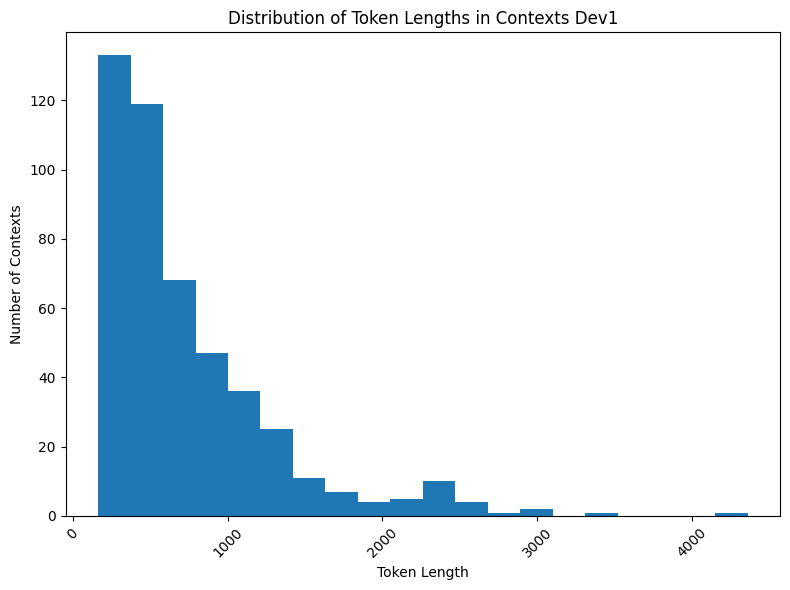

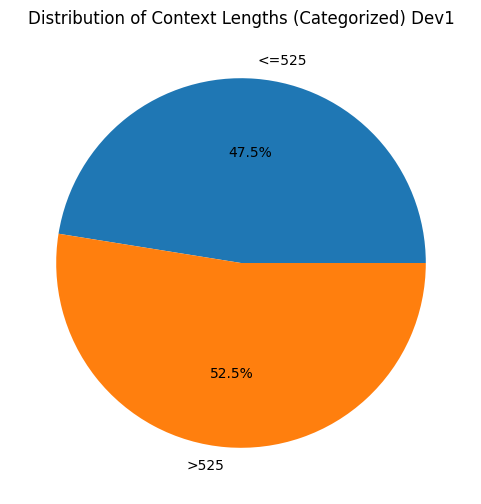

In [42]:
#   GermanQuAD - Dev set
max_token_length = 525

# Create a DataFrame
df_def = data_loader.build_simple_data_frame(dev_json)
print(len(df_def["context"]))

# Tokenize contexts using the loaded tokenizer
# Add a new column to the DataFrame for tokenized contexts
df_def["tokenized_context"] = df_def["context"].apply(
    lambda context: tokenizer.tokenize(context)
)

# Now you can analyze the tokenized versions of the contexts
print(df_def["tokenized_context"][0])  # Print the first few tokenized contexts


tokenized_context_lengths = []

for context in df_def["tokenized_context"]:
    tokenized_context_lengths.append(len(context))

token_length_distribution = {}
for length in tokenized_context_lengths:
    if length not in token_length_distribution:
        token_length_distribution[length] = 0
    token_length_distribution[length] += 1

print(token_length_distribution)

plt.figure(figsize=(8, 6))
plt.hist(tokenized_context_lengths, bins=20)  # Adjust the number of bins here
plt.xlabel("Token Length")
plt.ylabel("Number of Contexts")
plt.title("Distribution of Token Lengths in Contexts Dev1")
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

# Define max_token_lengths for categories
category_labels = ["<=" + str(max_token_length), ">" + str(max_token_length)]

# Count contexts in each category
category_counts = [0, 0]
for length in tokenized_context_lengths:
    if length <= max_token_length:
        category_counts[0] += 1
    else:
        category_counts[1] += 1

# Create the pie chart
plt.figure(figsize=(6, 6))
plt.pie(
    category_counts, labels=category_labels, autopct="%1.1f%%"
)  # Adjust format string for percentages
plt.title("Distribution of Context Lengths (Categorized) Dev1")
plt.show()

### Train set

### Dev + Train sets comparison

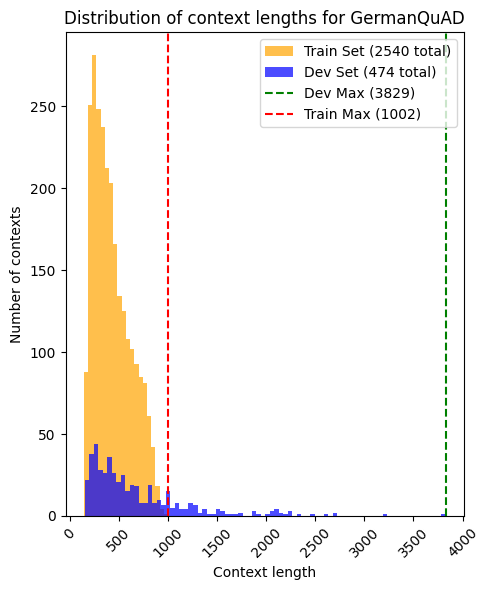

In [66]:
#   GermanQuAD - Dev set

max_token_length = 512

# Create a DataFrame
df_def = data_loader.build_simple_data_frame(dev_jsonGerman)
df_train = data_loader.build_simple_data_frame(train_jsonGerman)

# Tokenize contexts using the loaded tokenizer
# Add a new column to the DataFrame for tokenized contexts
df_def["tokenized_context"] = df_def["context"].apply(
    lambda context: tokenizer.tokenize(context)
)
df_train["tokenized_context"] = df_train["context"].apply(
    lambda context: tokenizer.tokenize(context)
)

tokenized_context_lengths_dev = []
tokenized_context_lengths_train = []

for context in df_def["tokenized_context"]:
    tokenized_context_lengths_dev.append(len(context))

for context in df_train["tokenized_context"]:
    tokenized_context_lengths_train.append(len(context))

max_token_length_dev = 0
for length in tokenized_context_lengths_dev:
    if length > max_token_length_dev:
        max_token_length_dev = length

max_token_length_train = 0
for length in tokenized_context_lengths_train:
    if length > max_token_length_train:
        max_token_length_train = length

# Create the histogram with clear labels and annotations
plt.figure(figsize=(5, 6))

# Plot distributions as histograms with different colors
plt.hist(tokenized_context_lengths_train, bins=20, alpha=0.7, label=f"Train Set ({len(tokenized_context_lengths_train)} total)", color="orange")
plt.hist(tokenized_context_lengths_dev, bins=80, alpha=0.7, label=f"Test Set ({len(tokenized_context_lengths_dev)} total)", color="blue")  # Adjust bins as needed

# Add red lines for max token lengths
plt.axvline(x=max_token_length_train, color='red', linestyle='--', label=f'Train Max ({max_token_length_train})')
plt.axvline(x=max_token_length_dev, color='green', linestyle='--', label=f'Test Max ({max_token_length_dev})')

plt.xlabel("Context length")
plt.ylabel("Number of contexts")
plt.title("Distribution of context lengths for GermanQuAD")
plt.xticks(rotation=45)  # Rotate x-axis labels for readability
plt.legend()
plt.autoscale(axis='y')
#plt.ylim(20) 
plt.tight_layout()
plt.show()


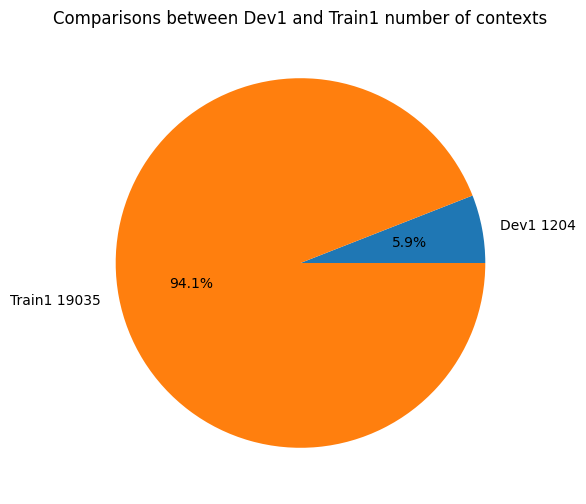

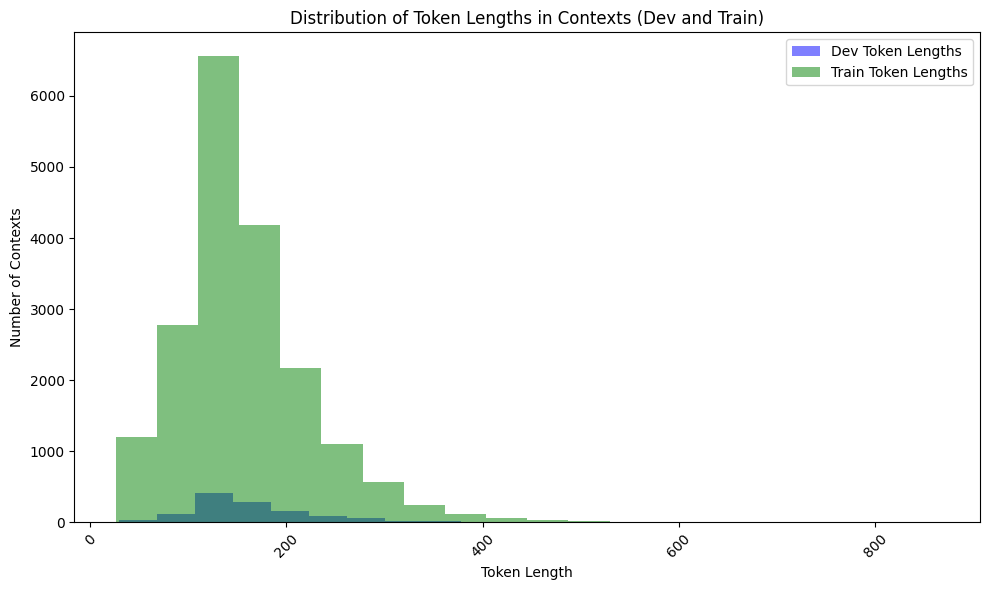

In [ ]:
#GermanQuAD  Dev + Train sets

compare_dev_train_1 = []
compare_dev_train_1.append(len(df_def["context"]))
compare_dev_train_1.append(len(df_train["context"]))

category_labels = [
    "Dev1 " + str(len(df_def["context"])),
    "Train1 " + str(len(df_train["context"])),
]

# Create the pie chart
plt.figure(figsize=(6, 6))
plt.pie(
    compare_dev_train_1, labels=category_labels, autopct="%1.1f%%"
)  # Adjust format string for percentages
plt.title("Comparisons between Dev1 and Train1 number of contexts")
plt.show()


# Tokenize contexts using the loaded tokenizer
df_def["tokenized_context"] = df_def["context"].apply(
    lambda context: tokenizer.tokenize(context)
)
df_train["tokenized_context"] = df_train["context"].apply(
    lambda context: tokenizer.tokenize(context)
)

# Analyze tokenized contexts
tokenized_context_lengths_dev = [
    len(context) for context in df_def["tokenized_context"]
]
tokenized_context_lengths_train = [
    len(context) for context in df_train["tokenized_context"]
]

# Plot both distributions in one histogram
plt.figure(figsize=(10, 6))

plt.hist(
    tokenized_context_lengths_dev,
    bins=20,
    alpha=0.5,
    label="Dev Token Lengths",
    color="blue",
)
plt.hist(
    tokenized_context_lengths_train,
    bins=20,
    alpha=0.5,
    label="Train Token Lengths",
    color="green",
)

plt.xlabel("Token Length")
plt.ylabel("Number of Contexts")
plt.title("Distribution of Token Lengths in Contexts (Dev and Train)")
plt.legend(loc="upper right")
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

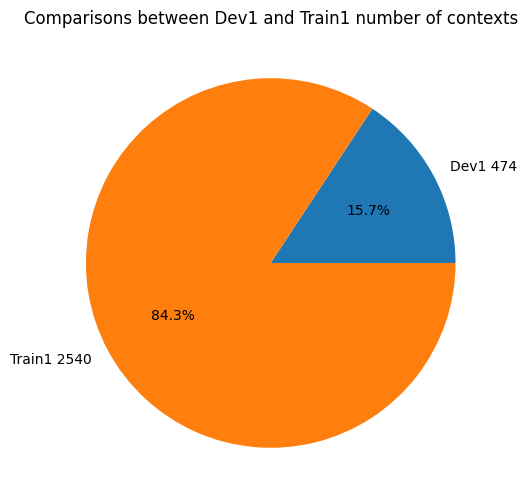

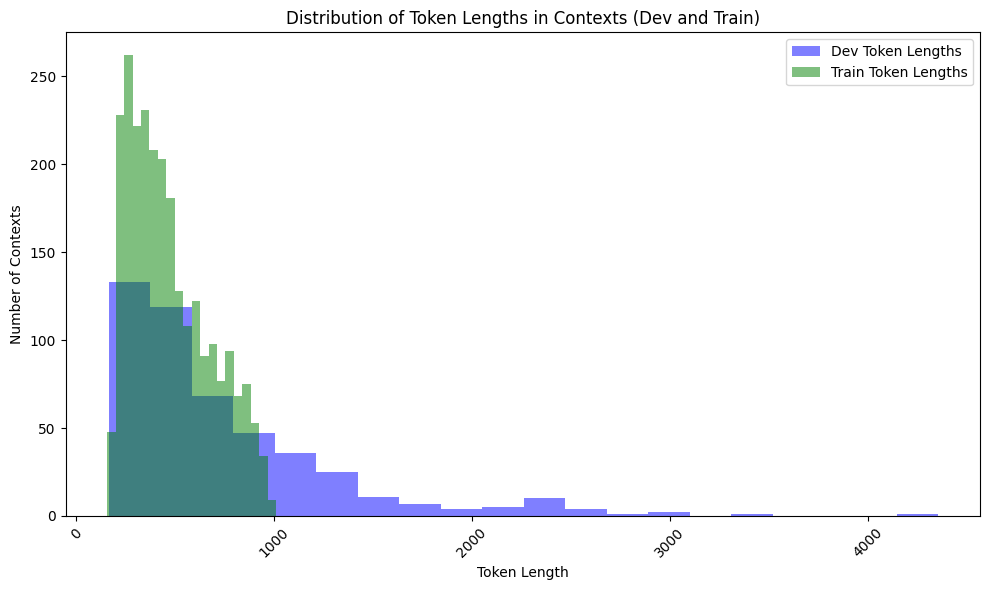

In [44]:

compare_dev_train_1 = []
compare_dev_train_1.append(len(df_def["context"]))
compare_dev_train_1.append(len(df_train["context"]))

category_labels = [
    "Dev1 " + str(len(df_def["context"])),
    "Train1 " + str(len(df_train["context"])),
]

# Create the pie chart
plt.figure(figsize=(6, 6))
plt.pie(
    compare_dev_train_1, labels=category_labels, autopct="%1.1f%%"
)  # Adjust format string for percentages
plt.title("Comparisons between Dev1 and Train1 number of contexts")
plt.show()


# Tokenize contexts using the loaded tokenizer
df_def["tokenized_context"] = df_def["context"].apply(
    lambda context: tokenizer.tokenize(context)
)
df_train["tokenized_context"] = df_train["context"].apply(
    lambda context: tokenizer.tokenize(context)
)

# Analyze tokenized contexts
tokenized_context_lengths_dev = [
    len(context) for context in df_def["tokenized_context"]
]
tokenized_context_lengths_train = [
    len(context) for context in df_train["tokenized_context"]
]

# Plot both distributions in one histogram
plt.figure(figsize=(10, 6))

plt.hist(
    tokenized_context_lengths_dev,
    bins=20,
    alpha=0.5,
    label="Dev Token Lengths",
    color="blue",
)
plt.hist(
    tokenized_context_lengths_train,
    bins=20,
    alpha=0.5,
    label="Train Token Lengths",
    color="green",
)

plt.xlabel("Token Length")
plt.ylabel("Number of Contexts")
plt.title("Distribution of Token Lengths in Contexts (Dev and Train)")
plt.legend(loc="upper right")
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

### Others

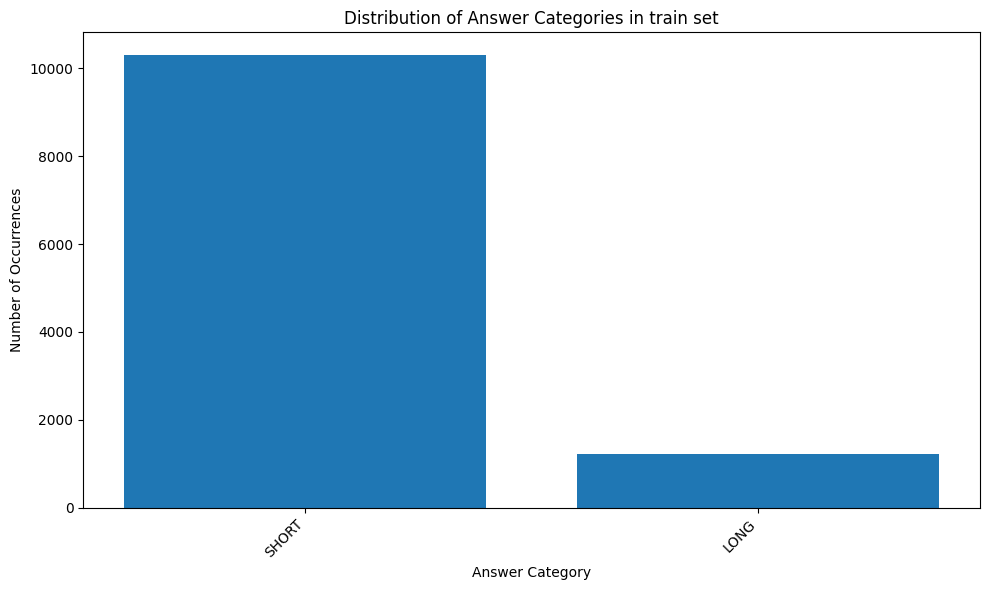

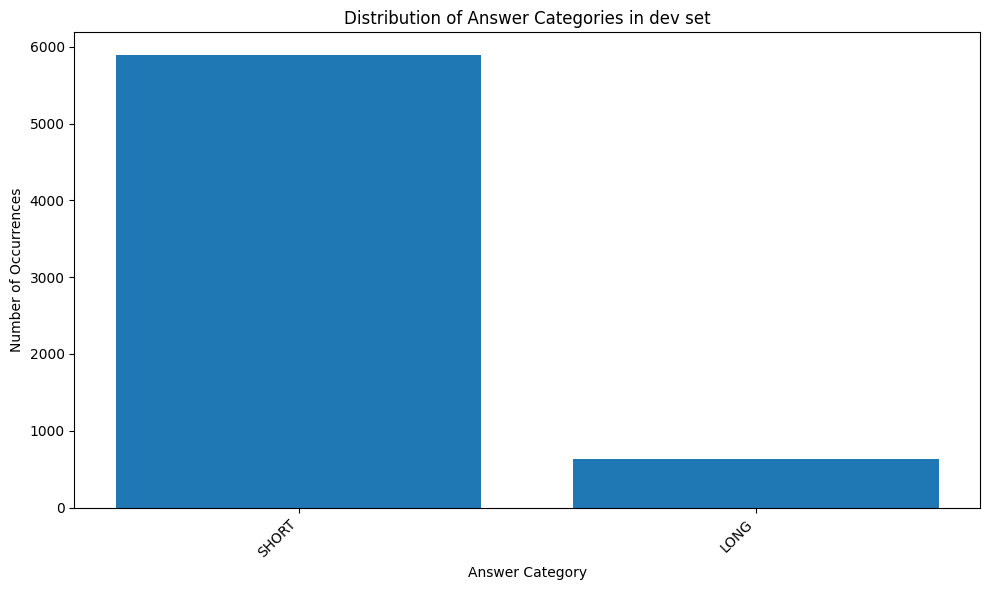

{3: 1694, 2: 339, 1: 135}
{2: 128, 1: 286, 3: 32}


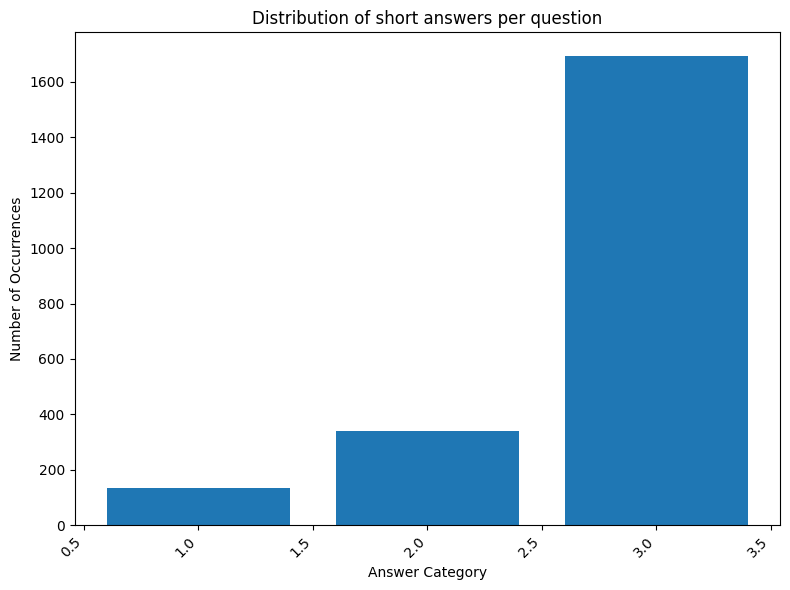

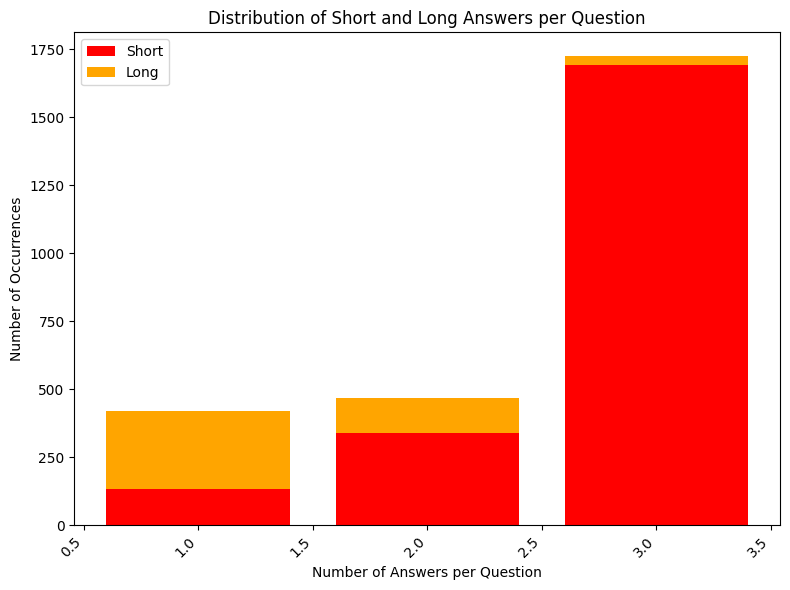

In [80]:

df_dev = data_loader.build_extended_data_frame_answer_category(dev_jsonGerman)
df_train = data_loader.build_extended_data_frame_answer_category(train_jsonGerman)



answer_categories_train = {}

for index, row in df_train.iterrows():
    answer_category = row['answer_category']
    if answer_category not in answer_categories_train:
        answer_categories_train[answer_category] = 1
    else:
        answer_categories_train[answer_category] += 1 

# Create the bar chart with answer category occurences 
plt.figure(figsize=(10, 6))
plt.bar(list(answer_categories_train.keys()), list(answer_categories_train.values()))
plt.xlabel("Answer Category")
plt.ylabel("Number of Occurrences")
plt.title("Distribution of Answer Categories in train set")
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for readability
plt.tight_layout()
plt.show()

answer_categories_dev = {}

for index, row in df_dev.iterrows():
    answer_category = row['answer_category']
    if answer_category not in answer_categories_dev:
        answer_categories_dev[answer_category] = 1
    else:
        answer_categories_dev[answer_category] += 1 

# Create the bar chart with answer category occurences 
plt.figure(figsize=(10, 6))
plt.bar(list(answer_categories_dev.keys()), list(answer_categories_dev.values()))
plt.xlabel("Answer Category")
plt.ylabel("Number of Occurrences")
plt.title("Distribution of Answer Categories in dev set")
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for readability
plt.tight_layout()
plt.show()

answer_category_per_question = {}

for index, row in df_dev.iterrows():
  question_id = row['question_id']
  answer_category = row['answer_category']
  if question_id not in answer_category_per_question:
    answer_category_per_question[question_id] = {}
  answer_category_per_question[question_id][answer_category] = answer_category_per_question[question_id].get(answer_category, 0) + 1

#print(answer_category_per_question)

answer_category_per_question_count_short = {}
answer_category_per_question_count_long = {}

def count_answer_category_per_question(dictionary, key):
    for question in answer_category_per_question.values():
        if key in question:
            if question[key] in dictionary:
                dictionary[question[key]] += 1
            else:
                dictionary[question[key]] = 1

def split_dict_into_sorted_list(dictionary):
    key_list = []
    value_list = []
    max_question_count = 0
    for question_count in dictionary.keys():
        if question_count > max_question_count:
            max_question_count = question_count
    for i in range(1, max_question_count + 1):
        key_list.append(i)
        if i in dictionary:
            value_list.append(dictionary[i])
        else:
            value_list.append(0)
    return key_list, value_list
        

count_answer_category_per_question(answer_category_per_question_count_short, 'SHORT')
count_answer_category_per_question(answer_category_per_question_count_long, 'LONG')

print(answer_category_per_question_count_short)
print(answer_category_per_question_count_long)
short_key_list, short_value_list = split_dict_into_sorted_list(answer_category_per_question_count_short)
long_key_list, long_value_list = split_dict_into_sorted_list(answer_category_per_question_count_long)

plt.figure(figsize=(8, 6))
plt.bar(answer_category_per_question_count_short.keys(), answer_category_per_question_count_short.values())
plt.xlabel("Answer Category")
plt.ylabel("Number of Occurrences")
plt.title(f"Distribution of short answers per question")
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for readability
plt.tight_layout()
plt.show()


plt.figure(figsize=(8, 6))
plt.bar(short_key_list, short_value_list, color="red", label="Short")
plt.bar(long_key_list, long_value_list, bottom=short_value_list, color="orange", label="Long")
plt.xlabel("Number of Answers per Question")
plt.ylabel("Number of Occurrences")
plt.title("Distribution of Short and Long Answers per Question")
plt.legend()
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for readability
plt.tight_layout()
plt.show()

# Val set splitting (across all 3 datasets)

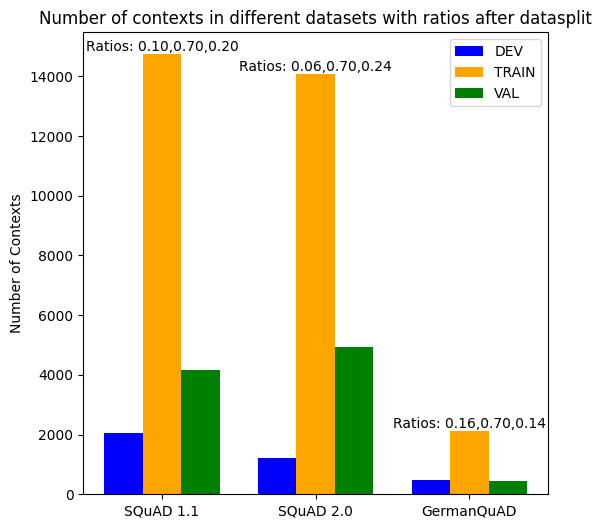

In [70]:

df_defS1 = data_loader.build_simple_data_frame(dev_jsonSQUAD1)
df_trainS1 = data_loader.build_simple_data_frame(train_jsonSQUAD1)
df_defS2 = data_loader.build_simple_data_frame(dev_jsonSQUAD2)
df_trainS2 = data_loader.build_simple_data_frame(train_jsonSQUAD2)
df_defGerman = data_loader.build_simple_data_frame(dev_jsonGerman)
df_trainGerman = data_loader.build_simple_data_frame(train_jsonGerman)

valS1 = 0.22 * len(df_trainS1)
valS2 = 0.26 * len(df_trainS2)
valGerman = 0.17 * len(df_trainGerman)

# Calculate lengths and ratios
lengths = {
    "SQuAD 1.1": (len(df_defS1), len(df_trainS1) - valS1, valS1),
    "SQuAD 2.0": (len(df_defS2), len(df_trainS2) - valS2, valS2),
    "GermanQuAD": (len(df_defGerman), len(df_trainGerman) - valGerman, valGerman)
}

ratiosDevTrain = {
    "SQuAD 1.1": len(df_defS1) / (len(df_defS1) + len(df_trainS1)),
    "SQuAD 2.0": len(df_defS2) / (len(df_defS2) + len(df_trainS2)),
    "GermanQuAD": len(df_defGerman) / (len(df_defGerman) + len(df_trainGerman))
}

ratiosAll = {
    "SQuAD 1.1": f"{len(df_defS1) / (len(df_defS1) + len(df_trainS1)):.2f},"
              f"{(len(df_trainS1) - valS1) / (len(df_defS1) + len(df_trainS1)):.2f},"
              f"{valS1 / (len(df_defS1) + len(df_trainS1)):.2f}",
    "SQuAD 2.0": f"{len(df_defS2) / (len(df_defS2) + len(df_trainS2)):.2f},"
              f"{(len(df_trainS2) - valS2) / (len(df_defS2) + len(df_trainS2)):.2f},"
              f"{valS2 / (len(df_defS2) + len(df_trainS2)):.2f}",
    "GermanQuAD": f"{len(df_defGerman) / (len(df_defGerman) + len(df_trainGerman)):.2f},"
              f"{(len(df_trainGerman) - valGerman) / (len(df_defGerman) + len(df_trainGerman)):.2f},"
              f"{valGerman / (len(df_defGerman) + len(df_trainGerman)):.2f}"
}

# Plotting
fig, ax = plt.subplots(figsize=(6, 6))

bar_width = 0.25
index = list(range(len(lengths)))

# Bars for dev, train, and validation
dev_values = [lengths[dataset][0] for dataset in lengths]
train_values = [lengths[dataset][1] for dataset in lengths]
val_values = [lengths[dataset][2] for dataset in lengths]

bars1 = ax.bar(index, dev_values, bar_width, label='DEV', color='blue')
bars2 = ax.bar([i + bar_width for i in index], train_values, bar_width, label='TRAIN', color='orange')
bars3 = ax.bar([i + bar_width * 2 for i in index], val_values, bar_width, label='VAL', color='green')

# Adding the ratios on top of the bars
for i, dataset in enumerate(lengths):
    ratio = ratiosAll[dataset]
    ax.text(i + bar_width, max(lengths[dataset]) + 100, f'Ratios: {ratio}', ha='center', color='black')

# Labels and title
ax.set_ylabel('Number of Contexts')
ax.set_title('Number of contexts in different datasets with ratios after datasplit')
ax.set_xticks([i + bar_width for i in index])
ax.set_xticklabels(lengths.keys())
ax.legend()

plt.show()

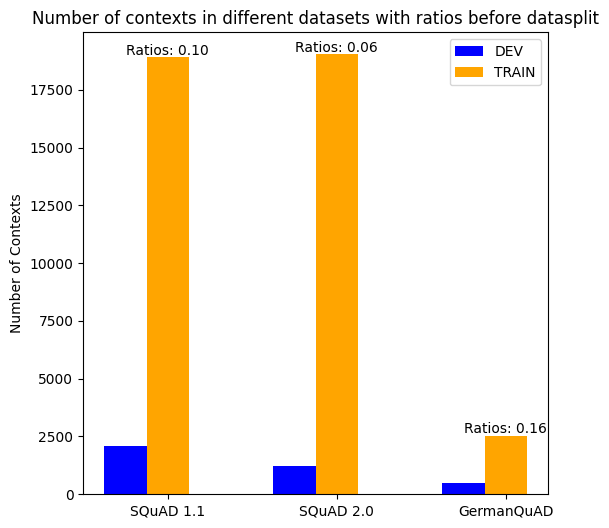

In [71]:

df_defS1 = data_loader.build_simple_data_frame(dev_jsonSQUAD1)
df_trainS1 = data_loader.build_simple_data_frame(train_jsonSQUAD1)
df_defS2 = data_loader.build_simple_data_frame(dev_jsonSQUAD2)
df_trainS2 = data_loader.build_simple_data_frame(train_jsonSQUAD2)
df_defGerman = data_loader.build_simple_data_frame(dev_jsonGerman)
df_trainGerman = data_loader.build_simple_data_frame(train_jsonGerman)


# Calculate lengths and ratios
lengths = {
    "SQuAD 1.1": (len(df_defS1), len(df_trainS1)),
    "SQuAD 2.0": (len(df_defS2), len(df_trainS2)),
    "GermanQuAD": (len(df_defGerman), len(df_trainGerman))
}

ratiosDevTrain = {
    "SQuAD 1.1": f"{len(df_defS1) / (len(df_defS1) + len(df_trainS1)):.2f}",
    "SQuAD 2.0": f"{len(df_defS2) / (len(df_defS2) + len(df_trainS2)):.2f}",
    "GermanQuAD": f"{len(df_defGerman) / (len(df_defGerman) + len(df_trainGerman)):.2f}"
}

""" ratiosAll = {
    "SQuAD": f"{len(df_defS1) / (len(df_defS1) + len(df_trainS1)):.2f},"
              f"{(len(df_trainS1) - valS1) / (len(df_defS1) + len(df_trainS1)):.2f},"
              f"{valS1 / (len(df_defS1) + len(df_trainS1)):.2f}",
    "SQuAD2": f"{len(df_defS2) / (len(df_defS2) + len(df_trainS2)):.2f},"
              f"{(len(df_trainS2) - valS2) / (len(df_defS2) + len(df_trainS2)):.2f},"
              f"{valS2 / (len(df_defS2) + len(df_trainS2)):.2f}",
    "German": f"{len(df_defGerman) / (len(df_defGerman) + len(df_trainGerman)):.2f},"
              f"{(len(df_trainGerman) - valGerman) / (len(df_defGerman) + len(df_trainGerman)):.2f},"
              f"{valGerman / (len(df_defGerman) + len(df_trainGerman)):.2f}"
} """

# Plotting
fig, ax = plt.subplots(figsize=(6, 6))

bar_width = 0.25
index = list(range(len(lengths)))

# Bars for dev, train, and validation
dev_values = [lengths[dataset][0] for dataset in lengths]
train_values = [lengths[dataset][1] for dataset in lengths]

bars1 = ax.bar(index, dev_values, bar_width, label='DEV', color='blue')
bars2 = ax.bar([i + bar_width for i in index], train_values, bar_width, label='TRAIN', color='orange')

# Adding the ratios on top of the bars
for i, dataset in enumerate(lengths):
    ratio = ratiosDevTrain[dataset]
    ax.text(i + bar_width, max(lengths[dataset]) + 100, f'Ratios: {ratio}', ha='center', color='black')

# Labels and title
ax.set_ylabel('Number of Contexts')
ax.set_title('Number of contexts in different datasets with ratios before datasplit')
ax.set_xticks([i + bar_width for i in index])
ax.set_xticklabels(lengths.keys())
ax.legend()

plt.show()